데이터 처리하는 방법
- numpy 배열로 불러오면 됨
- 이미지 : Pillow, OpenCV
- 오디오 : SciPy, LibROSA
- 텍스트 : Python, Cython, NLTK, SpaCy

영상 분야에는 torchvision을 사용하면 좋음

### 이번 실습의 목표
CIFAR10 데이터를 사용하여 분류하는 것이 목표
- 분류 종류
> airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

### 이번 실습의 과정
1. torchvision을 사용하여 CIFAR10의 학습용 / 시험용 데이터셋을 불러오고, 정규화
2. CNN 모델 정의
3. 손실 함수 정의
4. 학습용 데이터를 사용하여 신경망 학습
5. 시험용 데이터를 사용하여 신경망 검사

### 1. CIFAR10 불러오기, and 정규화

In [1]:
# data load
import torch
import torchvision
import torchvision.transforms as transforms

# kernel dead 방지
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# torchvision 데이터 셋의 output은 [0,1]범위를 가지는 PILImage 이미지
# 이를 [-1,1] 범위로 정규화된 Tensor로 변환
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                        download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4,
                                          shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                        download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                          shuffle = True, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


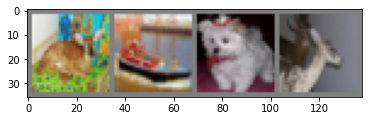

 deer  ship   dog  deer


In [3]:
# 학습용 이미지 랜덤 시각화
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# 학습용 랜덤 이미지
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 2. CNN 모델 정의하기

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 신경망 재료 구성하기
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # 실제 데이터와 엮기
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 3. Loss Function and Optimizer 정의하기

In [21]:
# Loss Function : Cross-Entropy Loss
# Optimizer : Momentum을 가지는 SGD
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

### 4. 신경망 학습하기

In [10]:
for epoch in range(20):
    running_loss = 0.0
    
    # minibatch -> trainloader의 batch_size가 4로 설정
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        # 한번 mini-batch학습 수행할 때 마다 초기화
        # 4-data 1-train
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 통계정보 요약
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss : %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    
print('Finished Training')

[1,  2000] loss : 1.241
[1,  4000] loss : 1.257
[1,  6000] loss : 1.241
[1,  8000] loss : 1.239
[1, 10000] loss : 1.237
[1, 12000] loss : 1.218
[2,  2000] loss : 1.156
[2,  4000] loss : 1.167
[2,  6000] loss : 1.166
[2,  8000] loss : 1.155
[2, 10000] loss : 1.150
[2, 12000] loss : 1.160
[3,  2000] loss : 1.074
[3,  4000] loss : 1.079
[3,  6000] loss : 1.093
[3,  8000] loss : 1.111
[3, 10000] loss : 1.099
[3, 12000] loss : 1.081
[4,  2000] loss : 1.015
[4,  4000] loss : 1.028
[4,  6000] loss : 1.029
[4,  8000] loss : 1.062
[4, 10000] loss : 1.075
[4, 12000] loss : 1.046
[5,  2000] loss : 0.950
[5,  4000] loss : 0.968
[5,  6000] loss : 0.995
[5,  8000] loss : 0.994
[5, 10000] loss : 1.026
[5, 12000] loss : 1.038
[6,  2000] loss : 0.923
[6,  4000] loss : 0.958
[6,  6000] loss : 0.947
[6,  8000] loss : 0.964
[6, 10000] loss : 0.963
[6, 12000] loss : 0.998
[7,  2000] loss : 0.889
[7,  4000] loss : 0.903
[7,  6000] loss : 0.916
[7,  8000] loss : 0.928
[7, 10000] loss : 0.944
[7, 12000] loss 

In [11]:
# 학습 모델 저장
# detail : https://pytorch.org/docs/stable/notes/serialization.html
PATH = './cifar_cnn_net.pth'
torch.save(net.state_dict(), PATH)

### 5. 신경망 평가하기

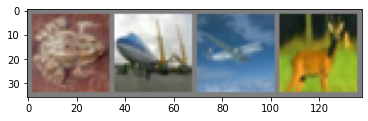

GroundTruth:   frog plane plane  deer


In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [13]:
# 위의 저장 학습 모델 불러오기
# 연습을 위해 불러오기 실습
# 학습 모델의 parameter 불러오기
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [14]:
# test sample image의 예측 결과
# 각 클래스의 확률 벡터들로 출력된다. (즉, 변환 필요)
outputs = net(images)

In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   frog truck plane  deer


In [17]:
# 전체 test에 대한 결과
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [18]:
# 각 class에 대한 accuracy 비교
# 각 class의 학습 난이도 비교
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        
        # 하나하나의 class에 업데이트
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 79 %
Accuracy of  bird : 53 %
Accuracy of   cat : 40 %
Accuracy of  deer : 53 %
Accuracy of   dog : 43 %
Accuracy of  frog : 66 %
Accuracy of horse : 63 %
Accuracy of  ship : 66 %
Accuracy of truck : 59 %


#### 요약
- car 분류 성능 79%로 가장 높음
- cat 분류 성능 40%로 가장 낮음

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


gpu 연결이 안되어 뒤의 tutorial은 생략... ㅠㅠ